# MMN 22 - course Information / Data Mining . 
This work was done as part of the "Information / Data Mining" course at the Open University.

The database (subjects from Mexico, Peru and Colombia can be found at: https://www.kaggle.com/mpwolke/obesity-levels-life-style/data )

Explanations about the data can be found in the article by Fabio Mendoza Palechor at: https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub )
 
The project's target:
Predict the degree of obesity of a subject from the set of given characteristics.

## This project is a continuation of Project 21

# q 1.a

Choose an algorithm of context rules.

Describe and analyze the algorithm you have chosen. Explain your choice.

# comlpete The answer !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# q 1.b
Assuming:
  
  Min_confidence = 60%, Min_support = 40%
 
 
  Find all the frequency groups using the algorithm you selected in section a.

In [1]:

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


df = pd.read_csv(r"./data/dataFromMMN21.csv", header=0, sep=',',index_col=0) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NObeyesdad                      2111 non-null   object 
 1   Gender                          2111 non-null   float64
 2   Age                             2111 non-null   float64
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   float64
 5   family_history_with_overweight  2111 non-null   float64
 6   FAVC                            2111 non-null   float64
 7   FCVC                            2111 non-null   float64
 8   NCP                             2111 non-null   float64
 9   CAEC                            2111 non-null   float64
 10  SMOKE                           2111 non-null   float64
 11  CH2O                            2111 non-null   float64
 12  SCC                             21

In [2]:
colmn_dict = {"FAVC": "high_caloric_food_consumption",
            "FCVC" :"vegetable_consumption",
            "NCP" : "Number_main_meals",
            "CAEC" : "food_between_meals",
            "CH2O" : "daily_water_intake",
            "CALC" : "Alcohol_consumption",
            "SCC" : "Monitoring_Calorie",
            "FAF" : "exercise_Frequency",
            "TUE" : "technological_devices_time",
            "MTRANS" : "P_transportation",
            "SMOKE" : "SMOKING",
            "Gender" : "Gender",
            "Age" : "Age",
            "Height" : "Height",
            "Weight" : "Weight",
            "family_history_with_overweight" :"family_history_with_overweight",
             "NObeyesdad" : "NObeyesdad",
             "bmi" : "BMI",
             "NCP_3" : "NCP_3"}

# 'NObeyesdad', 'Gender', 'Age', 'Height', 'Weight',
#        'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'CH2O', 'FAF',
#        'TUE', 'CALC', 'MTRANS', 'bmi', 'NCP_3']

In [3]:
colmn_dict["FCVC"]

'vegetable_consumption'

In [4]:
df.head()

,NObeyesdad,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,bmi
0,Normal_Weight,0.0,21.0,1.62,64.0,1.0,0.0,2.0,3.0,0.25,0.0,2.0,0.0,0.0,1.0,0.0,1.0,24.39
1,Normal_Weight,0.0,21.0,1.52,56.0,1.0,0.0,3.0,3.0,0.25,1.0,3.0,1.0,3.0,0.0,0.5,1.0,24.24
2,Normal_Weight,1.0,23.0,1.80,77.0,1.0,0.0,2.0,3.0,0.25,0.0,2.0,0.0,2.0,1.0,1.0,1.0,23.77
3,Overweight_Level_I,1.0,27.0,1.80,87.0,0.0,0.0,3.0,3.0,0.25,0.0,2.0,0.0,2.0,0.0,1.0,0.0,26.85
4,Overweight_Level_II,1.0,22.0,1.78,89.8,0.0,0.0,2.0,1.0,0.25,0.0,2.0,0.0,0.0,0.0,0.5,1.0,28.34


In [5]:
df.describe(include="all")

,NObeyesdad,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,bmi
count,2111,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Obesity_Type_I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.505921,24.315964,1.701620,86.586035,0.817622,0.883941,2.418986,2.685651,0.285173,0.020843,2.008053,0.045476,1.010313,0.657887,0.365467,0.748460,29.703240
std,NaN,0.500083,6.357078,0.093368,26.191163,0.386247,0.320371,0.533996,0.778079,0.117136,0.142893,0.612950,0.208395,0.850613,0.608956,0.256935,0.434001,8.015958
min,NaN,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,NaN,0.000000,20.000000,1.630000,65.470000,1.000000,1.000000,2.000000,2.660000,0.250000,0.000000,1.585000,0.000000,0.125000,0.000000,0.000000,0.000000,24.325000
50%,NaN,1.000000,23.000000,1.700000,83.000000,1.000000,1.000000,2.390000,3.000000,0.250000,0.000000,2.000000,0.000000,1.000000,0.630000,0.500000,1.000000,28.730000
75%,NaN,1.000000,26.000000,1.770000,107.430000,1.000000,1.000000,3.000000,3.000000,0.250000,0.000000,2.480000,0.000000,1.670000,1.000000,0.500000,1.000000,35.955000


,NObeyesdad,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,bmi,NCP_3
0,Normal_Weight,0.0,21.0,1.62,64.0,1.0,0.0,2.0,0.25,0.0,2.0,0.0,0.0,1.0,0.0,1.0,24.39,True
1,Normal_Weight,0.0,21.0,1.52,56.0,1.0,0.0,3.0,0.25,1.0,3.0,1.0,3.0,0.0,0.5,1.0,24.24,True
2,Normal_Weight,1.0,23.0,1.80,77.0,1.0,0.0,2.0,0.25,0.0,2.0,0.0,2.0,1.0,1.0,1.0,23.77,True
3,Overweight_Level_I,1.0,27.0,1.80,87.0,0.0,0.0,3.0,0.25,0.0,2.0,0.0,2.0,0.0,1.0,0.0,26.85,True
4,Overweight_Level_II,1.0,22.0,1.78,89.8,0.0,0.0,2.0,0.25,0.0,2.0,0.0,0.0,0.0,0.5,1.0,28.34,False


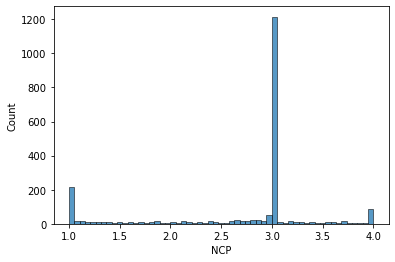

In [6]:
sns.histplot(x=df["NCP"])
df["NCP_3"] = [True if x == 3.0 else False for x in df["NCP"]]
df = df.drop(columns=["NCP"])
df.head()

C:\Users\dalei\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NCP_3', ylabel='count'>

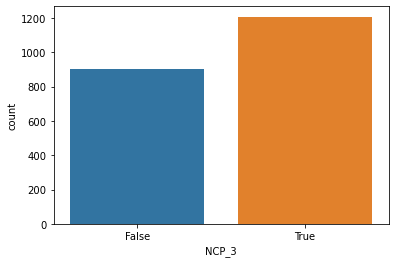

In [7]:
sns.countplot(df["NCP_3"])

,NObeyesdad,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,bmi,NCP_3
0,Normal_Weight,0.0,21.0,1.62,64.0,1.0,0.0,2.0,0.25,0.0,2.0,0.0,0.0,1.0,0.0,1.0,24.39,True
1,Normal_Weight,0.0,21.0,1.52,56.0,1.0,0.0,3.0,0.25,1.0,3.0,1.0,3.0,0.0,0.5,1.0,24.24,True
2,Normal_Weight,1.0,23.0,1.80,77.0,1.0,0.0,2.0,0.25,0.0,2.0,0.0,2.0,1.0,1.0,1.0,23.77,True
3,Overweight_Level_I,1.0,27.0,1.80,87.0,0.0,0.0,3.0,0.25,0.0,2.0,0.0,2.0,0.0,1.0,0.0,26.85,True
4,Overweight_Level_II,1.0,22.0,1.78,89.8,0.0,0.0,2.0,0.25,0.0,2.0,0.0,0.0,0.0,0.5,1.0,28.34,False


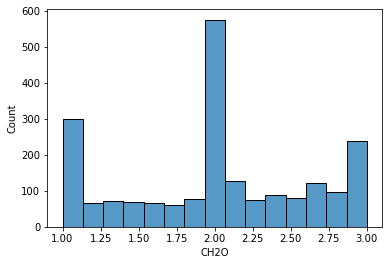

In [8]:
sns.histplot(x=df["CH2O"])

def CH2O_Change(x, bottom1, top1, bottom2, top2):
    if  1>=x:
        return 1
    elif 2> x > 1:
        return 1.5
    elif 2 == x:
        return 2
    elif 3> x > 2:
        return 2.5
    else:
        return 3



df["CH2O"] = df.apply(lambda row: CH2O_Change(x=row['CH2O'], bottom1=1.0, top1=3.0, bottom2=3.0, top2=4.0), axis=1)
# df = df.drop(columns=["NCP"])
df.head()

<AxesSubplot:xlabel='CH2O', ylabel='Count'>

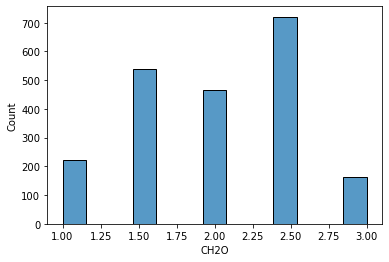

In [9]:
sns.histplot(x=df["CH2O"])


bining for Age BMI and Height

In [10]:
for item in ['bmi','Age']:
    df[item] = df[item].round().astype(int)
for item in ['Height']:
    df[item]=df[item].round(decimals=2).astype(float)

drop the columns "SCC","SMOKE" because they decreesing the strong ruls mennwhile they gust rare in the datasets

In [11]:
df = df.drop(columns=["SCC","SMOKE"])

In [12]:
category = []
not_category = []
for col_name in df.columns:
    if len(df[col_name].unique()) <=14 :
            df[col_name] = df[col_name].astype('category')
            category.append(col_name)
    else:
        number = 14
        not_category.append(col_name)
        
        status = True
        while(status):
            try:
                df[col_name] = pd.qcut(df[col_name], q=number)
                status = False
            except:               
#                 print(f"number of binns in {col_name} is less or equal to {number}\n")
                number -= 1
                status = True 
                
                
print("not category:\n")
print(not_category)
print("\n")

print("category:")
print(category)
print("\n")
df.info()

not category:

['Age', 'Height', 'Weight', 'FCVC', 'FAF', 'TUE', 'bmi']


category:
['NObeyesdad', 'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'CH2O', 'CALC', 'MTRANS', 'NCP_3']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   NObeyesdad                      2111 non-null   category
 1   Gender                          2111 non-null   category
 2   Age                             2111 non-null   category
 3   Height                          2111 non-null   category
 4   Weight                          2111 non-null   category
 5   family_history_with_overweight  2111 non-null   category
 6   FAVC                            2111 non-null   category
 7   FCVC                            2111 non-null   category
 8   CAEC                            2111 non-null   category
 9   CH2O      

In [13]:
df.head()

,NObeyesdad,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,CAEC,CH2O,FAF,TUE,CALC,MTRANS,bmi,NCP_3
0,Normal_Weight,0.0,"(20.0, 21.0]","(1.6, 1.62]","(62.881, 69.23]",1.0,0.0,"(0.999, 2.0]",0.25,2.0,"(-0.001, 0.01]","(0.99, 2.0]",0.0,1.0,"(23.0, 25.0]",True
1,Normal_Weight,0.0,"(20.0, 21.0]","(1.449, 1.56]","(55.751, 62.881]",1.0,0.0,"(2.95, 3.0]",0.25,3.0,"(1.95, 3.0]","(-0.001, 0.16]",0.5,1.0,"(23.0, 25.0]",True
2,Normal_Weight,1.0,"(22.0, 23.0]","(1.78, 1.8]","(75.146, 80.0]",1.0,0.0,"(0.999, 2.0]",0.25,2.0,"(1.95, 3.0]","(0.99, 2.0]",1.0,1.0,"(23.0, 25.0]",True
3,Overweight_Level_I,1.0,"(26.0, 30.0]","(1.78, 1.8]","(83.0, 88.114]",0.0,0.0,"(2.95, 3.0]",0.25,2.0,"(1.95, 3.0]","(-0.001, 0.16]",1.0,0.0,"(26.0, 28.0]",True
4,Overweight_Level_II,1.0,"(21.0, 22.0]","(1.76, 1.78]","(88.114, 97.983]",0.0,0.0,"(0.999, 2.0]",0.25,2.0,"(-0.001, 0.01]","(-0.001, 0.16]",0.5,1.0,"(26.0, 28.0]",False


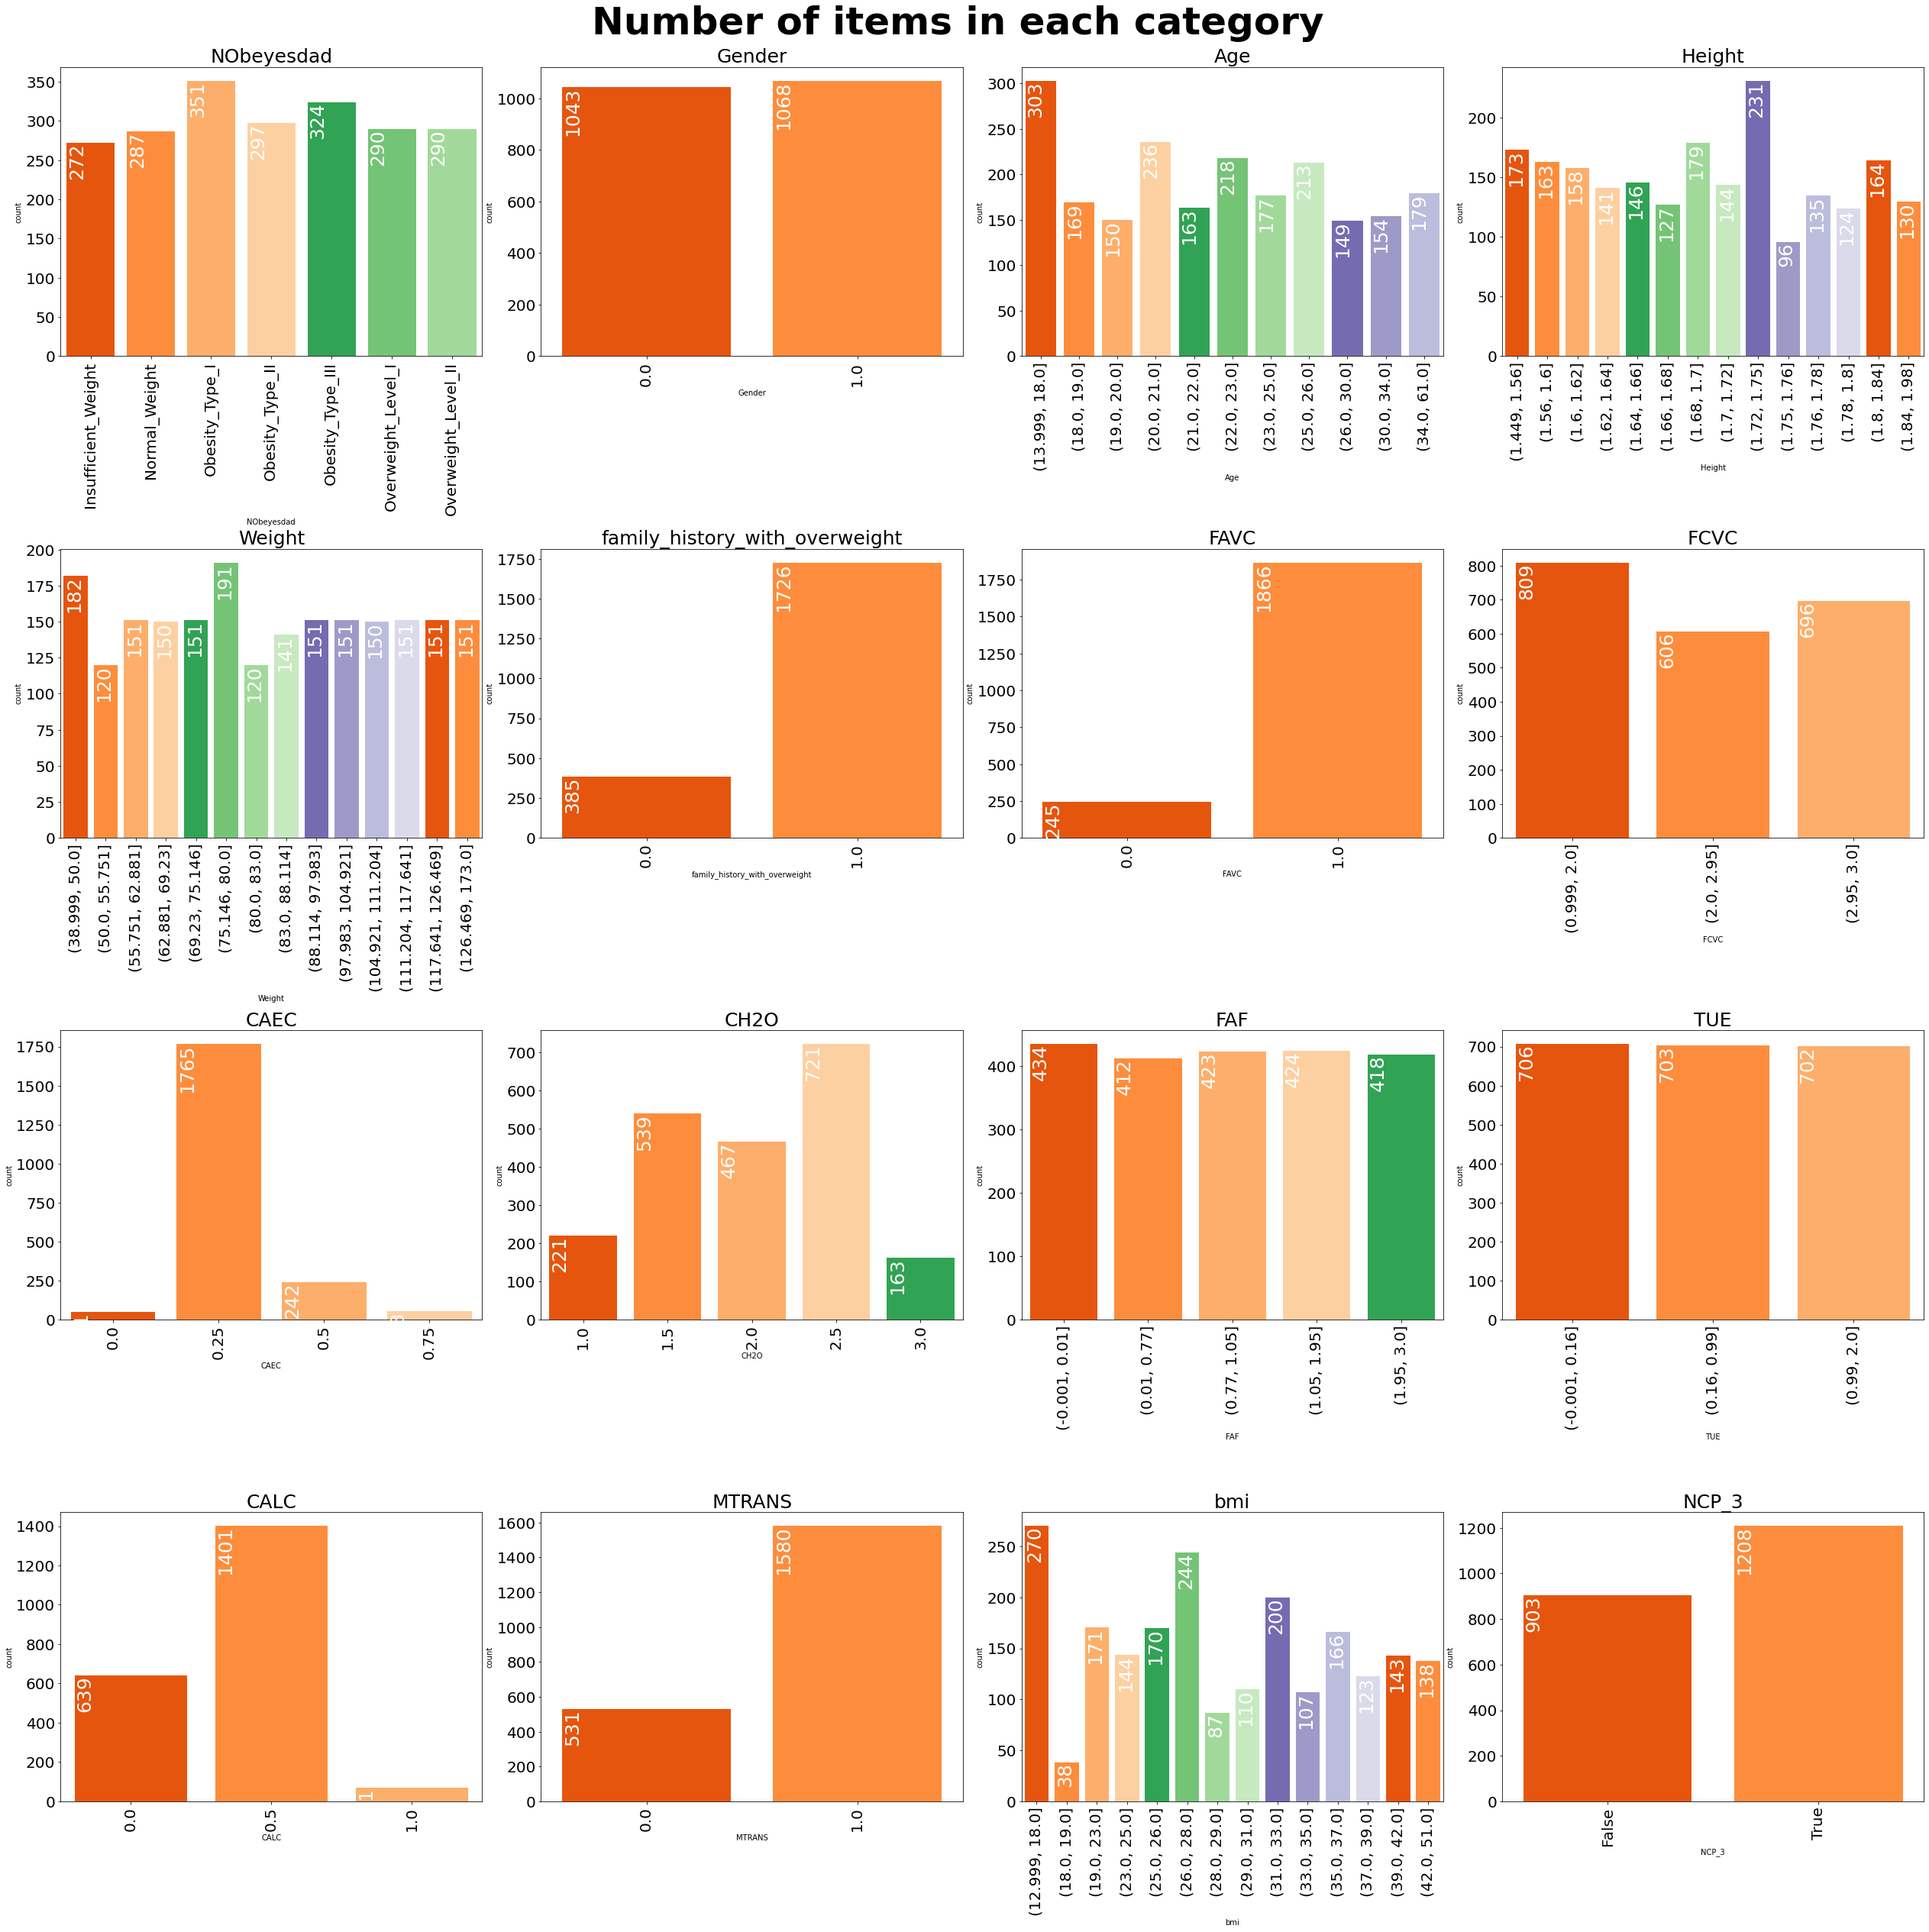

In [14]:

import warnings
warnings.filterwarnings("ignore")
base_plate =sns.color_palette("tab20c")[4:16]


fig, axs = plt.subplots(ncols = 4, nrows = 4, figsize = (35,35))
figure_title1 = "Number of items in each category "
plt.suptitle(figure_title1, y=1.00,fontsize=50,fontweight="bold")
idx = 0
axs = axs.flatten()
for k, v in df.items():  
        b = sns.countplot(x = k, data = df,ax=axs[idx] , order =None,saturation=1,palette=base_plate)
        for p in b.patches:
            b.annotate(f"\n{p.get_height()}", (p.get_x(), p.get_height()), 
                    ha = "center", va = "top", color = "w", size = 25,rotation=90)
        axs[idx].tick_params(axis='x', rotation=90,labelsize=20)
        axs[idx].tick_params(axis='y',labelsize=20)
        axs[idx].set_title(f"{k}",size=25)
        idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 0.5)

In [15]:
print(df.columns)

Index(['NObeyesdad', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'CH2O', 'FAF',
       'TUE', 'CALC', 'MTRANS', 'bmi', 'NCP_3'],
      dtype='object')


In [16]:
from mlxtend.frequent_patterns import fpgrowth

for column in df.columns:
    df = pd.get_dummies(df, prefix=colmn_dict[column], prefix_sep="_", columns=[column],dtype=bool)

fpgrowth_itemsets = fpgrowth(df, min_support=0.4, use_colnames=True)

fpgrowth_itemsets = fpgrowth_itemsets.sort_values("support",ascending=False)
fpgrowth_itemsets = fpgrowth_itemsets.reset_index(drop=True)
# fpgrowth_itemsets["itemsets"] = [list(x) for x in fpgrowth_itemsets["itemsets"]]
fpgrowth_itemsets["itemsets_list"] = fpgrowth_itemsets["itemsets"].apply(lambda x: ', '.join(list(x))).astype("unicode")
fpgrowth_itemsets = fpgrowth_itemsets.replace(colmn_dict)
fpgrowth_itemsets[["support","itemsets_list"]].to_csv("./data/fpgrowth_itemsets.csv")
fpgrowth_itemsets = fpgrowth_itemsets.drop(columns=["itemsets_list"])

fpgrowth_itemsets

,support,itemsets
0,0.883941,(high_caloric_food_consumption_1.0)
1,0.836097,(food_between_meals_0.25)
2,0.817622,(family_history_with_overweight_1.0)
3,0.761724,"(food_between_meals_0.25, high_caloric_food_co..."
4,0.748460,(P_transportation_1.0)
5,0.748460,"(family_history_with_overweight_1.0, high_calo..."
6,0.732354,"(family_history_with_overweight_1.0, food_betw..."
7,0.677404,"(family_history_with_overweight_1.0, food_betw..."
8,0.665561,"(P_transportation_1.0, high_caloric_food_consu..."
9,0.663667,(Alcohol_consumption_0.5)


In [17]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(fpgrowth_itemsets, metric="confidence", min_threshold=0.6) 
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_len"] = rules["consequents"].apply(lambda x: len(x))

for min_number_of_antecedents in [3,2,1]:
    strong_rules = rules[ (rules['antecedent_len'] >= min_number_of_antecedents) &
                         (rules['consequents_len'] == 1) &
           (rules['confidence'] > 0.6) &
           (rules['support'] > 0.4) ]
    strong_rules = strong_rules.sort_values(["antecedent_len","confidence","support"],ascending=[False, False, False])
    strong_rules = strong_rules.reset_index(drop=True)
    strong_rules_print = strong_rules.copy(deep=True)
    for col in ["antecedents","consequents"]:
        strong_rules_print[col] = strong_rules_print[col].apply(lambda x: ', '.join(list(x))).astype("unicode")
    # strong_rules["itemsets_list"] = strong_rules["itemsets"].apply(lambda x: ', '.join(list(x))).astype("unicode")
    strong_rules_print.to_csv(f"./data/fpgrowth_strong_rules_min_number_of_antecedents_{min_number_of_antecedents}.csv")
    # fpgrowth_itemsets = fpgrowth_itemsets.drop(columns=["itemsets_list"])
strong_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
0,"(food_between_meals_0.25, family_history_with_...",(high_caloric_food_consumption_1.0),0.504027,0.883941,0.477499,0.947368,1.071755,0.031969,2.205116,3,1
1,"(food_between_meals_0.25, P_transportation_1.0...",(high_caloric_food_consumption_1.0),0.441971,0.883941,0.417811,0.945338,1.069458,0.027135,2.123192,3,1
2,"(family_history_with_overweight_1.0, Alcohol_c...",(food_between_meals_0.25),0.506395,0.836097,0.477499,0.942937,1.127785,0.054104,2.872339,3,1
3,"(family_history_with_overweight_1.0, food_betw...",(high_caloric_food_consumption_1.0),0.434865,0.883941,0.405969,0.933551,1.056124,0.021574,1.746589,3,1
4,"(P_transportation_1.0, family_history_with_ove...",(high_caloric_food_consumption_1.0),0.536712,0.883941,0.497868,0.927626,1.049420,0.023446,1.603592,3,1
...,...,...,...,...,...,...,...,...,...,...,...
82,(P_transportation_1.0),(Alcohol_consumption_0.5),0.748460,0.663667,0.516817,0.690506,1.040442,0.020089,1.086722,1,1
83,(high_caloric_food_consumption_1.0),(Alcohol_consumption_0.5),0.883941,0.663667,0.607769,0.687567,1.036013,0.021127,1.076498,1,1
84,(food_between_meals_0.25),(Alcohol_consumption_0.5),0.836097,0.663667,0.573662,0.686119,1.033831,0.018772,1.071532,1,1
85,(family_history_with_overweight_1.0),(Alcohol_consumption_0.5),0.817622,0.663667,0.538134,0.658169,0.991717,-0.004495,0.983918,1,1


Unfortunately there is no “cause-effect relationship” that supports the value the study wanted to predict.

In [18]:
includeKeywords = ["NObeyesdad_Insufficient_Weight","NObeyesdad_Normal_Weight","NObeyesdad_Obesity_Type_I","NObeyesdad_Obesity_Type_II","NObeyesdad_Obesity_Type_III","NObeyesdad_Overweight_Level_I","NObeyesdad_Overweight_Level_II"]
strong_rules_consequents_target = strong_rules[strong_rules.stack().str.contains('|'.join(includeKeywords)).groupby(level=0).any()]
strong_rules_consequents_target

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len


# q 2.a